<center>
    <h1><b>Phân Tích và Dự Đoán Trạng Thái Tâm Lý Qua Miêu Tả Dạng Văn Bản</b></h1>
    <h2><b>Học phần: Học máy</b></h2>
    <h3><b>Giảng viên: TS. Cao Văn Chung</b></h3>
</center>

---
**Sinh viên thực hiện:**
- Trần Anh Minh - 21000242
- Dương Đức Vương - 22000133
- Nguyễn Tuấn Kiệt - 22000100

## Tiền xử lý dữ liệu

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as mp
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re as r
from nltk.stem import PorterStemmer

* Tải dữ liệu và quan sát trực quan

In [4]:
df=pd.read_csv("New Data.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
max_count=df['status'].value_counts().max()

In [9]:
def resample_data(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()

    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=max_count,
                                          random_state=42)
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])

    return df_resampled


df = resample_data(df)

In [10]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text = r.sub(r'[^a-zA-Z0-9\s]', '', x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))


    return " ".join(l)

In [11]:
df['statement']=df['statement'].apply(preprocessing)

In [12]:
x=df['statement']
y=df['status']

In [13]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,random_state=42,test_size=0.2)
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,random_state=42,test_size=0.3)
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y,random_state=42,test_size=0.4)


## MULTINOMIAL LOGISTIC REGRESSION

* Vector hóa tập các tập train/ test bằng TF-TDF

In [ ]:
# TF-IDF từng tập train, test
vec1 = TfidfVectorizer()
x_train_tfidf1 = vec1.fit_transform(x_train1)
x_test_tfidf1 = vec1.transform(x_test1)

vec2 = TfidfVectorizer()
x_train_tfidf2 = vec2.fit_transform(x_train2)
x_test_tfidf2 = vec2.transform(x_test2)

vec3 = TfidfVectorizer()
x_train_tfidf3 = vec3.fit_transform(x_train3)
x_test_tfidf3 = vec3.transform(x_test3)



* Số chiều từng tập train, test

In [17]:
print("Tập train 1 (4:1):")
print("Số chiều tập train:", x_train_tfidf1.shape)
print("Số chiều tập test:", x_test_tfidf1.shape)

print("Tập train 2 (7:3):")
print("Số chiều tập train:", x_train_tfidf2.shape)
print("Số chiều tập test:", x_test_tfidf2.shape)

print("Tập train 3 (6:4):")
print("Số chiều tập train:", x_train_tfidf3.shape)
print("Số chiều tập test:", x_test_tfidf3.shape)

Tập train 1 (4:1):
Số chiều tập train: (125068, 54552)
Số chiều tập test: (31268, 54552)
Tập train 2 (7:3):
Số chiều tập train: (109435, 51231)
Số chiều tập test: (46901, 51231)
Tập train 3 (6:4):
Số chiều tập train: (93801, 47660)
Số chiều tập test: (62535, 47660)


* Dùng thư viện để huấn luyện mô hình, phân loại tập test và đánh giá mô hình

Tập train 1 (4:1):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.946047076883715


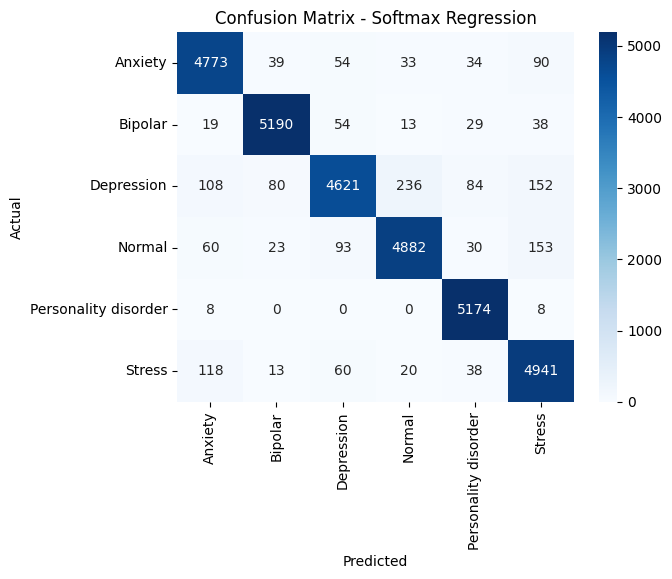

                      precision    recall  f1-score   support

             Anxiety       0.94      0.95      0.94      5023
             Bipolar       0.97      0.97      0.97      5343
          Depression       0.95      0.88      0.91      5281
              Normal       0.94      0.93      0.94      5241
Personality disorder       0.96      1.00      0.98      5190
              Stress       0.92      0.95      0.93      5190

            accuracy                           0.95     31268
           macro avg       0.95      0.95      0.95     31268
        weighted avg       0.95      0.95      0.95     31268

Tập train 2 (7:3):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9433487558900663


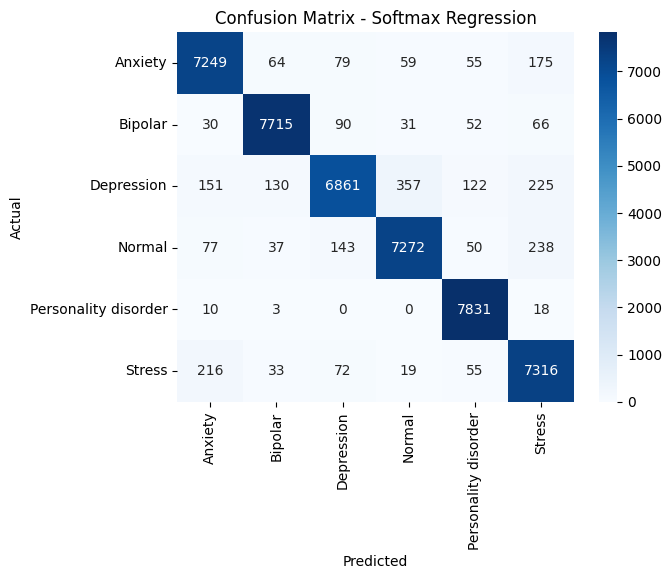

                      precision    recall  f1-score   support

             Anxiety       0.94      0.94      0.94      7681
             Bipolar       0.97      0.97      0.97      7984
          Depression       0.95      0.87      0.91      7846
              Normal       0.94      0.93      0.94      7817
Personality disorder       0.96      1.00      0.98      7862
              Stress       0.91      0.95      0.93      7711

            accuracy                           0.94     46901
           macro avg       0.94      0.94      0.94     46901
        weighted avg       0.94      0.94      0.94     46901

Tập train 3 (6:4):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9396497961141761


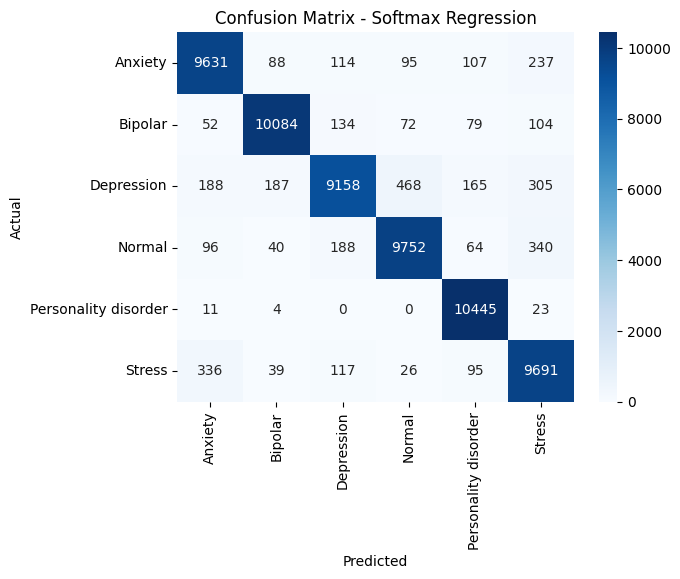

                      precision    recall  f1-score   support

             Anxiety       0.93      0.94      0.94     10272
             Bipolar       0.97      0.96      0.96     10525
          Depression       0.94      0.87      0.91     10471
              Normal       0.94      0.93      0.93     10480
Personality disorder       0.95      1.00      0.97     10483
              Stress       0.91      0.94      0.92     10304

            accuracy                           0.94     62535
           macro avg       0.94      0.94      0.94     62535
        weighted avg       0.94      0.94      0.94     62535



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hàm huấn luyện mô hình softmax (logistic regression đa lớp)

def softmax_regression(x_train_tfidf, x_test_tfidf, y_train, y_test, model):
  model.fit(x_train_tfidf, y_train)

  # Dự đoán
  y_pred = model.predict(x_test_tfidf)

  # Độ chính xác
  print("Accuracy:", accuracy_score(y_test, y_pred))

  # Ma trận nhầm lẫn
  cm = confusion_matrix(y_test, y_pred)
  sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
  mp.xlabel("Predicted")
  mp.ylabel("Actual")
  mp.title("Confusion Matrix - Softmax Regression")
  mp.show()

  # Báo cáo chi tiết
  print(classification_report(y_test, y_pred))

# Chạy trên các tập train khác nhau
print("Tập train 1 (4:1):")
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_regression(x_train_tfidf1, x_test_tfidf1, y_train1, y_test1, model1)

print("Tập train 2 (7:3):")
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_regression(x_train_tfidf2, x_test_tfidf2, y_train2, y_test2, model2)

print("Tập train 3 (6:4):")
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_regression(x_train_tfidf3, x_test_tfidf3, y_train3, y_test3, model3)



## MULTINOMIAL NAIVE BAYES

* Vector hóa các tập train/test theo tần suất từ (Bag of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vector hóa các tập train, test bằng CountVectorizer
count_vec1 = CountVectorizer()
x_train_counts1 = count_vec1.fit_transform(x_train1)
x_test_counts1 = count_vec1.transform(x_test1)

count_vec2 = CountVectorizer()
x_train_counts2 = count_vec2.fit_transform(x_train2)
x_test_counts2 = count_vec2.transform(x_test2)

count_vec3 = CountVectorizer()
x_train_counts3 = count_vec3.fit_transform(x_train3)
x_test_counts3 = count_vec3.transform(x_test3)

* Số chiều của các tập train, test sau khi vector hóa theo tuần suất từ

In [18]:
print("Tập train 1 (4:1):")
print("Số chiều tập train:", x_train_counts1.shape)
print("Số chiều tập test:", x_test_counts1.shape)

print("Tập train 2 (7:3):")
print("Số chiều tập train:", x_train_counts2.shape)
print("Số chiều tập test:", x_test_counts2.shape)

print("Tập train 3 (6:4):")
print("Số chiều tập train:", x_train_counts3.shape)
print("Số chiều tập test:", x_test_counts3.shape)

Tập train 1 (4:1):
Số chiều tập train: (125068, 54552)
Số chiều tập test: (31268, 54552)
Tập train 2 (7:3):
Số chiều tập train: (109435, 51231)
Số chiều tập test: (46901, 51231)
Tập train 3 (6:4):
Số chiều tập train: (93801, 47660)
Số chiều tập test: (62535, 47660)


* Dùng thư viện để huấn luyện mô hình, phân loại tập test và đánh giá mô hình

Tập train 1 (4:1):
Accuracy: 0.8163937571958552


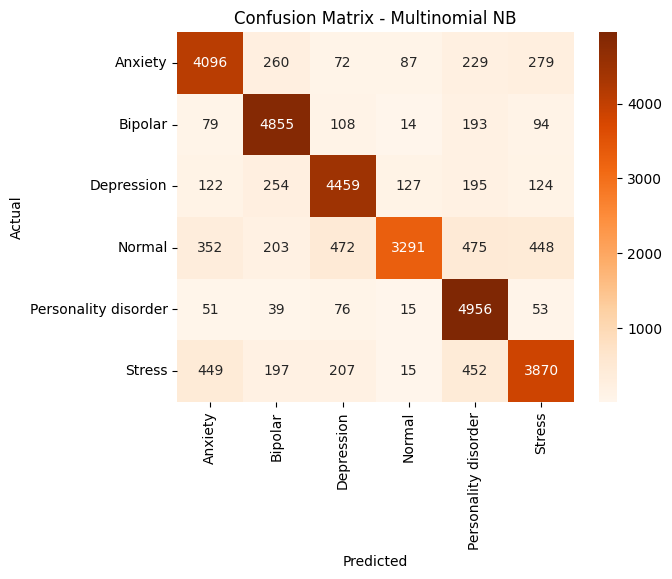

                      precision    recall  f1-score   support

             Anxiety       0.80      0.82      0.81      5023
             Bipolar       0.84      0.91      0.87      5343
          Depression       0.83      0.84      0.84      5281
              Normal       0.93      0.63      0.75      5241
Personality disorder       0.76      0.95      0.85      5190
              Stress       0.79      0.75      0.77      5190

            accuracy                           0.82     31268
           macro avg       0.82      0.82      0.81     31268
        weighted avg       0.82      0.82      0.81     31268

Tập train 2 (7:3):
Accuracy: 0.8136713502910385


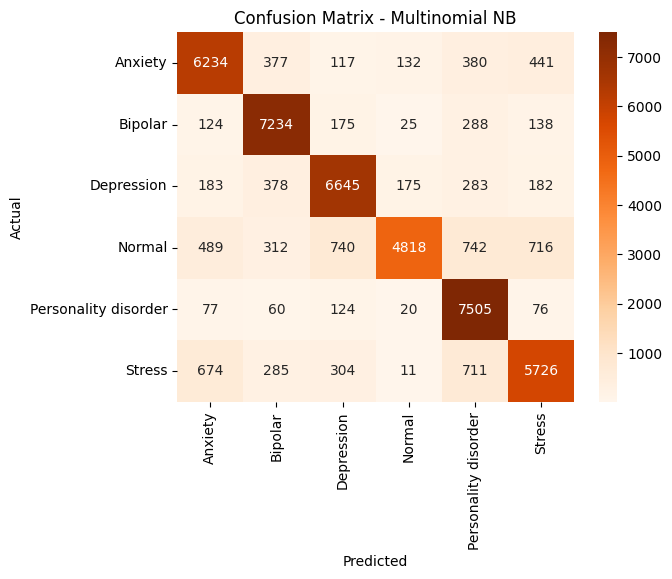

                      precision    recall  f1-score   support

             Anxiety       0.80      0.81      0.81      7681
             Bipolar       0.84      0.91      0.87      7984
          Depression       0.82      0.85      0.83      7846
              Normal       0.93      0.62      0.74      7817
Personality disorder       0.76      0.95      0.84      7862
              Stress       0.79      0.74      0.76      7711

            accuracy                           0.81     46901
           macro avg       0.82      0.81      0.81     46901
        weighted avg       0.82      0.81      0.81     46901

Tập train 3 (6:4):
Accuracy: 0.809130886703446


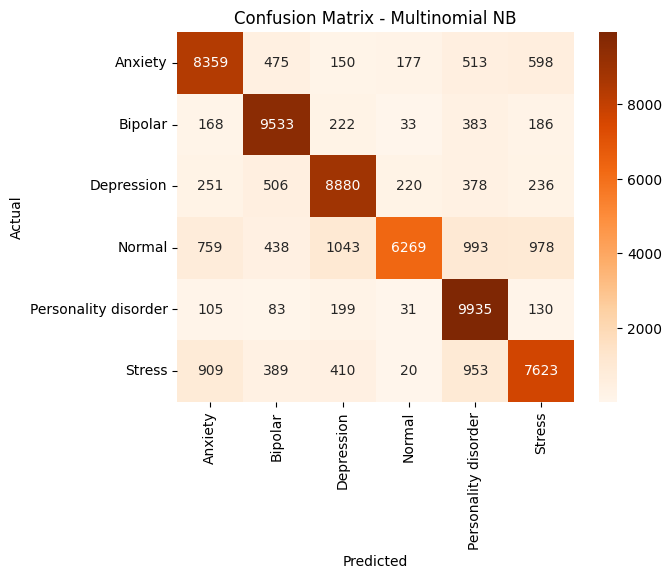

                      precision    recall  f1-score   support

             Anxiety       0.79      0.81      0.80     10272
             Bipolar       0.83      0.91      0.87     10525
          Depression       0.81      0.85      0.83     10471
              Normal       0.93      0.60      0.73     10480
Personality disorder       0.76      0.95      0.84     10483
              Stress       0.78      0.74      0.76     10304

            accuracy                           0.81     62535
           macro avg       0.82      0.81      0.81     62535
        weighted avg       0.82      0.81      0.81     62535



In [16]:

# Huấn luyện Multinomial Naive Bayes
def multinomial_nb_model(x_train_counts, x_test_counts, y_train, y_test, model_nb):
    model_nb.fit(x_train_counts, y_train)

    y_pred = model_nb.predict(x_test_counts)

    print("Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sn.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
    mp.xlabel("Predicted")
    mp.ylabel("Actual")
    mp.title("Confusion Matrix - Multinomial NB")
    mp.show()

    print(classification_report(y_test, y_pred))

print("Tập train 1 (4:1):")
model_nb1 = MultinomialNB()
multinomial_nb_model(x_train_counts1, x_test_counts1, y_train1, y_test1, model_nb1)

print("Tập train 2 (7:3):")
model_nb2 = MultinomialNB()
multinomial_nb_model(x_train_counts2, x_test_counts2, y_train2, y_test2, model_nb2)

print("Tập train 3 (6:4):")
model_nb3 = MultinomialNB()
multinomial_nb_model(x_train_counts3, x_test_counts3, y_train3, y_test3, model_nb3)